In [7]:
import pandas as pd
import numpy as np

In [9]:
data = { 
    'area': [2600,3000,3200,3600,4000],
    'bedrooms': [3, 4, 0, 3, 5],
    'age':[20,15,18,30,8],
    'price': [550000,565000,610000,595000,760000]
}
df = pd.DataFrame(data)
df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,0,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


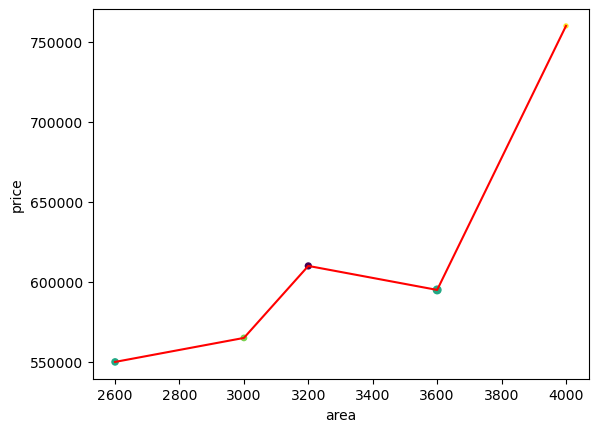

In [49]:
import matplotlib.pyplot as plt
plt.scatter(df.area, df.price,df.age, df.bedrooms)
plt.plot(df.area, df.price, color="red")
plt.xlabel("area")
plt.ylabel("price")
plt.show()


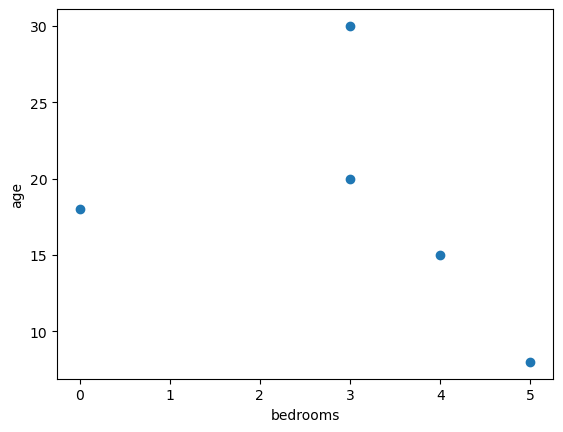

In [65]:
plt.scatter(df.bedrooms, df.age)
plt.xlabel("bedrooms")
plt.ylabel("age")
plt.show()

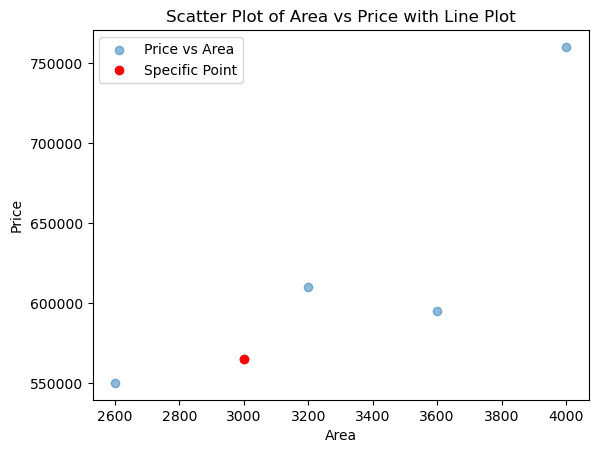

In [35]:
import matplotlib.pyplot plt

# Assuming df is your DataFrame with columns: area, price, age, and bedrooms
plt.scatter(df['area'], df['price'], label='Price vs Area', alpha=0.5)
plt.plot(df['area'].iloc[1], df['price'].iloc[1], 'ro', label='Specific Point')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Area vs Price with Line Plot')
plt.legend()
plt.show()


price = m1*area + m2 *bedrooms + m3 * age +b 

y = m1x1 + m2x2 + m3x3 +b

# **Topics**
## **Data Preprocessing: Handlind NA values**
## **Linear Regression Using Multiple Variable**

In [140]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [142]:
df = pd.read_csv("houseprice.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [144]:
# calculating the median of bedrooms column
import math

median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [146]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [148]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms', 'age']],df.price)


LinearRegression()

In [150]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [152]:
reg

LinearRegression()

**predit at 3000 area, 3 bedrooms and 40 age**

In [155]:
reg.intercept_

383724.9999999998

In [157]:
reg.predict([[3000,3,40]])

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

y = m1x1 + m2x2 + m3x3 +b

In [160]:
y = 137.25*3000 + (-26025*3)+(-6825*40) + 383724.9999999998
y

444399.9999999998

In [162]:
# B


doing it from scratch

formula to find the m is m0 = (ATA)^-1 ATY

In [166]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [168]:
AT = np.array([[1,1,1,1,1],
    [2600,3000,3200,3600,4000],
             [3,4,3,3,5],
             [20,15,18,30,8]])
AT

array([[   1,    1,    1,    1,    1],
       [2600, 3000, 3200, 3600, 4000],
       [   3,    4,    3,    3,    5],
       [  20,   15,   18,   30,    8]])

In [170]:
#Y = np.array(df[["price"]])
YT = np.array([[550000,565000,610000,595000,760000]])
YT

array([[550000, 565000, 610000, 595000, 760000]])

In [172]:
Y = np.transpose(YT)
Y

array([[550000],
       [565000],
       [610000],
       [595000],
       [760000]])

In [174]:
#Pseudo inverse
#AT = np.linalg.pinv(A)
#AT

In [176]:
A = np.transpose(AT)
A

array([[   1, 2600,    3,   20],
       [   1, 3000,    4,   15],
       [   1, 3200,    3,   18],
       [   1, 3600,    3,   30],
       [   1, 4000,    5,    8]])

In [178]:
AT_A = np.matmul(AT, A)
AT_A

array([[       5,    16400,       18,       91],
       [   16400, 54960000,    60200,   294600],
       [      18,    60200,       68,      304],
       [      91,   294600,      304,     1913]])

In [180]:
AT_A_inv = np.linalg.inv(AT_A)
AT_A_inv

array([[ 2.90831875e+01,  1.14437500e-03, -6.00493750e+00,
        -6.05437500e-01],
       [ 1.14437500e-03,  2.06875000e-06, -1.61187500e-03,
        -1.16875000e-04],
       [-6.00493750e+00, -1.61187500e-03,  2.22568750e+00,
         1.80187500e-01],
       [-6.05437500e-01, -1.16875000e-04,  1.80187500e-01,
         1.86875000e-02]])

In [182]:
AT_Y = np.matmul(AT, Y)
AT_Y

array([[   3080000],
       [1669065408],
       [  11325000],
       [  54385000]])

In [184]:
print(AT_Y.shape, A.shape, AT.shape, YT.shape, AT_A_inv.shape)

(4, 1) (5, 4) (4, 5) (1, 5) (4, 4)


In [186]:
B = np.matmul(AT_A_inv, AT_Y)
B

array([[-9446381.39872007],
       [  -17633.1771872 ],
       [13819875.82048003],
       [  997123.60544   ]])

In [188]:
price = B[0] + B[1]*3000 + B[2]*3 + B[3]*40 
price

array([18998658.71872003])

In [190]:
B = np.matmul(AT_A_inv, AT_Y)
B
# B = np.linalg.inv(AT_A).dot(AT)
# B

array([[-9446381.39872007],
       [  -17633.1771872 ],
       [13819875.82048003],
       [  997123.60544   ]])

In [192]:
price = B[0] + B[1]*3000 + B[2]*3 + B[3]*40 
price

array([18998658.71872003])

In [194]:
# why did you do this man?
b_o = B.dot(YT)
b_o

array([[-5.19550977e+12, -5.33720549e+12, -5.76229265e+12,
        -5.62059693e+12, -7.17924986e+12],
       [-9.69824745e+09, -9.96274511e+09, -1.07562381e+10,
        -1.04917404e+10, -1.34012147e+10],
       [ 7.60093170e+12,  7.80822984e+12,  8.43012425e+12,
         8.22282611e+12,  1.05031056e+13],
       [ 5.48417983e+11,  5.63374837e+11,  6.08245399e+11,
         5.93288545e+11,  7.57813940e+11]])

**predit at 3000 area, 3 bedrooms and 40 age**

In [197]:
price = b_o[0] + b_o[1]*3000 + b_o[2]*3 + b_o[3]*40 
price

array([1.04492623e+13, 1.07342422e+13, 1.15891818e+13, 1.13042019e+13,
       1.44389806e+13])

# **Saving the model in binary file**

In [200]:
import joblib

In [202]:
joblib.dump(reg, 'multivariable_reg_model')

['multivariable_reg_model']

In [206]:
mj = joblib.load('multivariable_reg_model')
mj.predict([[3000,3,40]])

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

## **Home Work**

In [80]:
!pip install word2number

In [81]:
import pandas as pd 
import numpy as np

In [82]:
df = pd.read_csv("hiring.csv")

In [83]:
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [84]:
import math

In [91]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [93]:
from word2number import w2n

In [95]:
df['experience'] = df['experience'].apply(w2n.word_to_num)

In [97]:
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [99]:
median_data = math.floor(df.test_score.median())
median_data

8

In [101]:
df.test_score = df.test_score.fillna(median_data)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [103]:
from sklearn import linear_model 

In [105]:
reg = linear_model.LinearRegression()

In [107]:
reg.fit(df[['experience', 'test_score', 'interview_score']], df.salary)

LinearRegression()

In [109]:
a = reg.predict([[15,9, 10]])
a 

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([98595.34206696])

In [111]:
accuracy = reg.score(df[['experience','test_score','interview_score']], df.salary)
accuracy

0.9616780002577959

In [113]:
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [115]:
import numpy as np

In [117]:
YT = np.array([[50000, 45000,60000,65000,70000,62000,72000,80000]])
YT

array([[50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000]])

In [119]:
Y = np.transpose(YT)
Y

array([[50000],
       [45000],
       [60000],
       [65000],
       [70000],
       [62000],
       [72000],
       [80000]])

In [121]:
XT = np.array([[1,1,1,1,1,1,1,1],
              [0,0,5,2,7,3,10,11],
              [8,8,6,10,9,7,8,7],
              [9,6,7,10,6,10,7,8]])
XT

array([[ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  5,  2,  7,  3, 10, 11],
       [ 8,  8,  6, 10,  9,  7,  8,  7],
       [ 9,  6,  7, 10,  6, 10,  7,  8]])

In [123]:
X = np.transpose(XT)
X

array([[ 1,  0,  8,  9],
       [ 1,  0,  8,  6],
       [ 1,  5,  6,  7],
       [ 1,  2, 10, 10],
       [ 1,  7,  9,  6],
       [ 1,  3,  7, 10],
       [ 1, 10,  8,  7],
       [ 1, 11,  7,  8]])

In [125]:
XT_X = np.matmul(XT, X)
XT_X

array([[  8,  38,  63,  63],
       [ 38, 308, 291, 285],
       [ 63, 291, 507, 498],
       [ 63, 285, 498, 515]])

In [127]:
XT_X_inv = np.linalg.inv(XT_X).
XT_X_inv

SyntaxError: invalid syntax (4068146932.py, line 1)

In [129]:
z = np.linalg.inv(XT_X).dot(XT)
z

array([[ 1.74374752e-01,  1.50942834e+00,  1.88719068e+00,
        -2.04217944e+00, -1.89559349e-01,  7.29786952e-02,
        -2.90955406e-01, -1.21278285e-01],
       [-3.46367606e-02, -5.30964669e-02, -1.38282387e-02,
         6.94720127e-04,  1.48868599e-02, -7.47651184e-03,
         4.20471086e-02,  5.14092894e-02],
       [-2.09077676e-02, -4.82995898e-03, -1.76128093e-01,
         1.79502448e-01,  1.32195316e-01, -1.06391425e-01,
         4.67116581e-02, -5.01521768e-02],
       [ 3.55299722e-02, -1.38944025e-01, -3.93013100e-02,
         9.52759031e-02, -1.01230647e-01,  1.17506947e-01,
        -1.92536721e-02,  5.04168321e-02]])

In [131]:
z_o = z.dot(Y)
z_o

array([[17737.26346434],
       [ 2812.95487627],
       [ 1845.70596798],
       [ 2205.24017467]])

**Predict for 15,9, 10**

In [134]:
Y_predict = z_o[0] + z_o[1]*15 + z_o[2]*9 + z_o[3]*10
Y_predict

array([98595.34206696])

In [136]:
# Home work done

### ***Practice***

In [75]:
import numpy as np

In [77]:
matrix = np.array([[1,2,3],
                   [4,5,6],
                  [7,8,9]])
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [79]:
p_inv = np.linalg.pinv(matrix)
p_inv

array([[-6.38888889e-01, -1.66666667e-01,  3.05555556e-01],
       [-5.55555556e-02,  1.38777878e-16,  5.55555556e-02],
       [ 5.27777778e-01,  1.66666667e-01, -1.94444444e-01]])

In [81]:
inv = np.linalg.inv(matrix)
inv

array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

In [83]:
det = np.linalg.det(matrix)
det

-9.51619735392994e-16

In [85]:
matrix_heavy = inv.dot(p_inv).dot(matrix).dot(inv).dot(p_inv).dot(matrix).dot(inv).dot(p_inv).dot(matrix)
matrix_heavy

array([[ 2.63151042,  0.25260417, -2.12630208],
       [-7.28385417,  0.28645833,  7.85677083],
       [ 1.80598958, -0.87760417, -3.56119792]])

# **Practice Question**

In [2]:
import pandas as pd
import numpy as np


In [53]:
data = {
    'a' : [1,2,3,4,5],
    'b' : [1,2,1.3,3.75,2.25]
}

data = pd.DataFrame(data)

In [55]:
data

,a,b
0,1,1.00
1,2,2.00
2,3,1.30
3,4,3.75
4,5,2.25


In [57]:
from sklearn.linear_model import LinearRegression

In [59]:
regressor = LinearRegression()

In [63]:
t = regressor.fit(data, data)

In [95]:
t.intercept_
t.coef_

array([[1.00000000e+00, 2.10650008e-16],
       [1.40433339e-16, 1.00000000e+00]])

In [67]:
from matplotlib import pyplot as plt

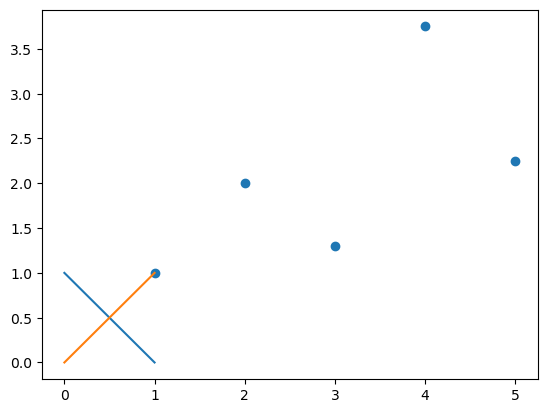

In [97]:
plt.scatter(data.a, data.b)
plt.plot(t.coef_)
plt.show()